# DDW 2D Task 3

## Contributions
* Aaron Tua Zhe Yu - LR modelling
* Ansley Tan An Qing - Data preprocessing
* Patrick Phone Myat Mo - Website
* Stefanie Tan Hui Zhen - LR modelling
* Abhijith Kizhakke Chittadath - Data preprocessing

## Overview

[Projections](https://www.un.org/en/global-issues/food) show that the world is not on track to achieve Zero Hunger by 2030 and, despite some progress, most indicators are also not on track to meet global nutrition targets. The food security and nutritional status of the most vulnerable population groups is likely to deteriorate further due to the health and socio-economic impacts of the COVID-19 pandemic.

[The Global Food Security programme](https://www.foodsecurity.ac.uk/challenge/#:~:text=Food%20security%20occurs%20when%20all,will%20be%20essential%20to%20solve) estimates 768 million people around the world face hunger on a daily basis and more than 2 billion people lack vital micronutrients such as iron, zinc, vitamin A, etc.

It is therefore imperative that we have a model - based on quantifiable metrics from a country's statistics - that can determine a country's susceptibility to food insecurity and track their progress over the years, even when food insecurity is difficulty to measure.

Thus, we are using a country's **prevalence of moderate and severe food insecurity** among its population as the target metric.

### User Personas

We created 2 user personas to understand and determine the key contributors to food insecurity. These two personas are separated by socioeconomic class and face different challenges when it comes to ensuring their food security.

#### Persona 1: Low-income

**Trevor Phillips**
* Single unemployed man
* Finds income through odd jobs
* Lives in rural area
    - Stress from being unemployed and having a non-structured lifestyle
    - Food is cheap but hardly nutritious
    - Strongly considers the life of crime to make ends meet

#### Persona 2: Middle-income

**Amanda Townley**
* Mother of 2 children, both adolescents
* Works 1 full-time job
* Lives in densely populated middle-income neighbourhood
    - Has to take care of family and prepare food for them, but hard to afford due to high food prices
    - Long hours prevents him from eating enough, or often; has to resort to consuming instant food
    - Stress from work causes a loss in appetite
    - Dense city district lengthens travel time and decreases leisure time

### Problem Statement
How might we predict the food security of a country indicated by the prevalence of food insecurity through the consideration of that country's wealth, food prices, social stability, general stress levels, education levels, asymmetry in food supply and the population density?

## Datasets

We have connected the variables to corresponding quantifiable metrics:
* [Food Prices](https://www.theglobaleconomy.com/rankings/food_price_index_wb/)
* [Crime Index](https://www.kaggle.com/datasets/ahmadjalalmasood123/world-crime-index)
* [Food Waste](https://wedocs.unep.org/bitstream/handle/20.500.11822/35355/FWD.xlsx)
    - **Asymmetry in food supply**: High food waste might signal that those experiencing food insecurity are not having access to adequate food.
* [Average Work Hours](https://ilostat.ilo.org/topics/working-time/?)
    - **Stress levels**: More work means leisure time, and corresponds to [higher stress](https://www.frontiersin.org/articles/10.3389/fpsyg.2021.775522/full).
* [GDP per capita (PPP)](https://statisticstimes.com/economy/world-gdp-capita-ranking.php)
    - **Country's wealth** - Common economic indicator to determine a country's wealth level depending on its population size and productivity.
* [Literacy Rates](https://worldpopulationreview.com/country-rankings/literacy-rate-by-country)
    - **Education level** - Common social indicator to determine a country's education level.
* [Population Size](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations))
* [Population Density](https://data.worldbank.org/indicator/EN.POP.DNST?end=2019&most_recent_year_desc=false&start=1986)
* [Prevalence of Moderate or Severe Food Insecurity](https://www.fao.org/faostat/en/#data/FS)

## Features and Target Preparation

### Initial Data Preprocessing

We identified 34 countries that spans both developed and developing economies for our model.

This is captured in `countries.csv` and is flattened as a 1D array to be used for preprocessing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
countries = [
    "Argentina",
    "Australia",
    "Bangladesh",
    "Belgium",
    "Botswana",
    "Brazil",
    "Canada",
    "Chile",
    "Ecuador",
    "Egypt",
    "France",
    "Germany",
    "Hungary",
    "Indonesia",
    "Iran",
    "Italy",
    "Malaysia",
    "Mexico",
    "Namibia",
    "Pakistan",
    "Peru",
    "Philippines",
    "Poland",
    "Romania",
    "Russia",
    "Singapore",
    "South Africa",
    "South Korea",
    "Spain",
    "United Arab Emirates",
    "United Kingdom",
    "Ukraine",
    "United States of America"
]

We selected 8 predictor variables to predict the prevalence of food insecurity in each country.

1. Food prices
2. Crime index
3. Amount of food waste
4. Average working hours
5. GDP per capita, adjusted for purchasing power parity
6. Literacy rate
7. Population size
8. Population density

### Preprocessing Helpers

Due to the large number of datasets used, there is substantial clean up required. We wrote helper functions to help standardise our data's country names and cast the columns to their respective types.

In [3]:
replacement_map = {
    "United States": "United States of America",
    "UA Emirates": "United Arab Emirates",
    "UK": "United Kingdom",
    "USA": "United States of America",
    "Republic of Korea": "South Korea",
    "Iran (Islamic Republic of)": "Iran",
    "Russian Federation": "Russia",
    "Iran, Islamic Republic of": "Iran",
    "Korea, Republic of": "South Korea",
    "Egypt, Arab Rep.": "Egypt",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Rep.": "South Korea",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"
}

import functools as ft
def prepare_countries(_df):
    """Standardises the column of countries according to the fixed list.

    Args:
        _df (pd.DataFrame): Dataframe.

    Returns:
        pd.DataFrame: Dataframe.
    """
    return _df.replace(replacement_map)

def merge_data_func(left, right):
    left = prepare_countries(left)
    left = left[left["Country"].isin(countries)]
    right = prepare_countries(right)
    right = right[right["Country"].isin(countries)]
    return pd.merge(left, right, on="Country", how="outer")

def merge_data(_dfs):
    """Merges a list of dataframes into the first dataframe. Union.

    Args:
        _dfs (list): List of pd.DataFrame.

    Returns:
        pd.DataFrame: Union merge of dataframes.
    """
    return ft.reduce(merge_data_func, _dfs)
    
def prepare_types(_df, colname, datatype):
    _df[colname] = _df[colname].astype(datatype)
    return _df

def prepare_food_prices(_df):
    return _df

def prepare_crime_index(_df):
    _df["Country"] = _df["City"].apply(lambda x: x.split(", ")[-1])
    country_map = {}
    dfout = prepare_countries(_df)
    dfout = dfout[dfout["Country"].isin(countries)]
    for _, row in dfout.iterrows():
        row_country = row["Country"]
        if row_country in countries:
            crime_index = float(row["Crime Index"])
            country_map[row_country] = crime_index if not row_country in country_map else max(crime_index, country_map[row_country])
    return pd.DataFrame({ "Country": country_map.keys(), "Crime index": country_map.values() })

def prepare_food_waste(_df):
    dfout = _df.replace("*", 0)
    return prepare_types(dfout, "Food waste", float)

def prepare_work_hours(_df):
    dfout = _df[["Country", "Average hours per week per employed person"]]
    dfout = dfout.rename(columns={"Average hours per week per employed person": "Average work hours"})
    return prepare_types(dfout, "Average work hours", float)

def prepare_gdp(_df):
    dfout = _df[["Country", "GDP per capita (PPP) in 2019"]].replace("-", 0)
    dfout = dfout.rename(columns={"GDP per capita (PPP) in 2019": "GDP per capita"})
    return prepare_types(dfout, "GDP per capita", float)

def prepare_literacy(_df):
    dfout = _df[["country", "latestRate"]]
    dfout = dfout.rename(columns={"country": "Country", "latestRate": "Literacy rate"})
    return prepare_types(dfout, "Literacy rate", float)

def prepare_population(_df):
    return prepare_types(_df, "Population", int)

def prepare_population_density(_df):
    dfout = _df[["Country Name", "2020"]]
    dfout = dfout.rename(columns={"Country Name": "Country", "2020": "Population density"})
    return prepare_types(dfout, "Population density", float)

### Reading and Merging Predictors

We read each predictor dataset, performed the preprocessing on them and merged them into a table.

In [4]:
df_countries = pd.DataFrame(countries, columns=["Country"])

df_food = pd.read_csv("datasets/food-prices.csv")
df_food = prepare_food_prices(df_food)

df_crime = pd.read_csv("datasets/crime-index.csv")
df_crime = prepare_crime_index(df_crime)

df_fw = pd.read_csv("datasets/food-waste.csv")
df_fw = prepare_food_waste(df_fw)

df_wh = pd.read_csv("datasets/average-working-hours.csv")
df_wh = prepare_work_hours(df_wh)

df_gdp = pd.read_csv("datasets/gdp-capita.csv")
df_gdp = prepare_gdp(df_gdp)

df_literacy = pd.read_csv("datasets/literacy-rate.csv")
df_literacy = prepare_literacy(df_literacy)

df_pop = pd.read_csv("datasets/population.csv")
df_pop = prepare_population(df_pop)

df_pd = pd.read_csv("datasets/population-density.csv")
df_pd = prepare_population_density(df_pd)

df_predictors = merge_data([df_countries, df_food, df_crime, df_fw, df_wh, df_gdp, df_literacy, df_pop, df_pd])

### Preparing Target Variable

Likewise, we did the same with the target variable, which in this case is the variable `Prevalence of food insecurity`.

In [5]:
def prepare_food_insecurity(_df):
    dfout = prepare_countries(_df)
    dfout = dfout[(dfout["Area"].isin(countries)) &( dfout["Item"] == "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)")][["Area", "Value"]]
    dfout = dfout.rename(columns={"Area": "Country", "Value": "Prevalence of food insecurity"})
    return prepare_types(dfout, "Prevalence of food insecurity", float)

In [6]:
df_un = pd.read_csv("datasets/prevalence-of-food-insecurity.csv")
df_un = prepare_food_insecurity(df_un)

df = merge_data([df_predictors, df_un])
df

,Country,Food Prices,Crime index,Food waste,Average work hours,GDP per capita,Literacy rate,Population,Population density,Prevalence of food insecurity
0,Argentina,122.409,75.11,72.432163,35.13,22947.0,98.0900,44780677,16.580893,37.0
1,Australia,153.540,73.51,101.697811,33.23,53320.0,99.0000,25203198,3.340250,11.9
2,Bangladesh,79.094,63.66,65.124075,46.93,4951.0,61.4938,163046161,1265.186932,31.7
3,Belgium,129.240,57.38,49.919512,35.71,54545.0,99.0000,11539328,381.249703,4.8
4,Botswana,98.008,55.67,91.939766,45.75,18503.0,88.2244,2303697,4.149463,55.6
5,Brazil,107.662,77.93,59.598854,35.11,15259.0,92.5868,211049527,25.431425,28.9
6,Canada,137.341,64.58,78.541621,32.10,51342.0,99.0000,37411047,4.242577,6.5
7,Chile,120.959,59.80,73.920770,34.63,25155.0,96.6275,18952038,25.710002,17.4
8,Ecuador,103.177,70.59,72.432163,37.90,11847.0,94.5155,17373662,71.038251,36.8
9,Egypt,52.288,49.68,91.016180,46.23,12251.0,75.8426,100388073,102.802153,27.3


In [7]:
df.describe()

,Food Prices,Crime index,Food waste,Average work hours,GDP per capita,Literacy rate,Population,Population density,Prevalence of food insecurity
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000
mean,104.741364,58.446364,74.835938,39.482727,32236.666667,93.554264,7.695422e+07,392.511336,20.139394
std,30.079415,15.953770,15.701060,4.801018,22282.582432,10.169154,8.079553e+07,1371.446161,16.545315
min,52.288000,16.300000,33.375521,32.100000,4885.000000,56.440300,2.303697e+06,3.086295,3.500000
25%,79.097000,53.170000,69.868672,35.850000,13341.000000,94.374400,1.936456e+07,25.759255,6.300000
50%,100.450000,60.200000,75.000000,38.670000,29181.000000,96.774600,4.673678e+07,94.810908,13.400000
75%,123.827000,70.590000,86.337127,43.080000,48710.000000,99.000000,1.003881e+08,201.035203,31.700000
max,202.794000,81.980000,101.697811,52.580000,101376.000000,99.787400,3.290649e+08,7918.951253,57.900000


### Visualising Predictor Relationships

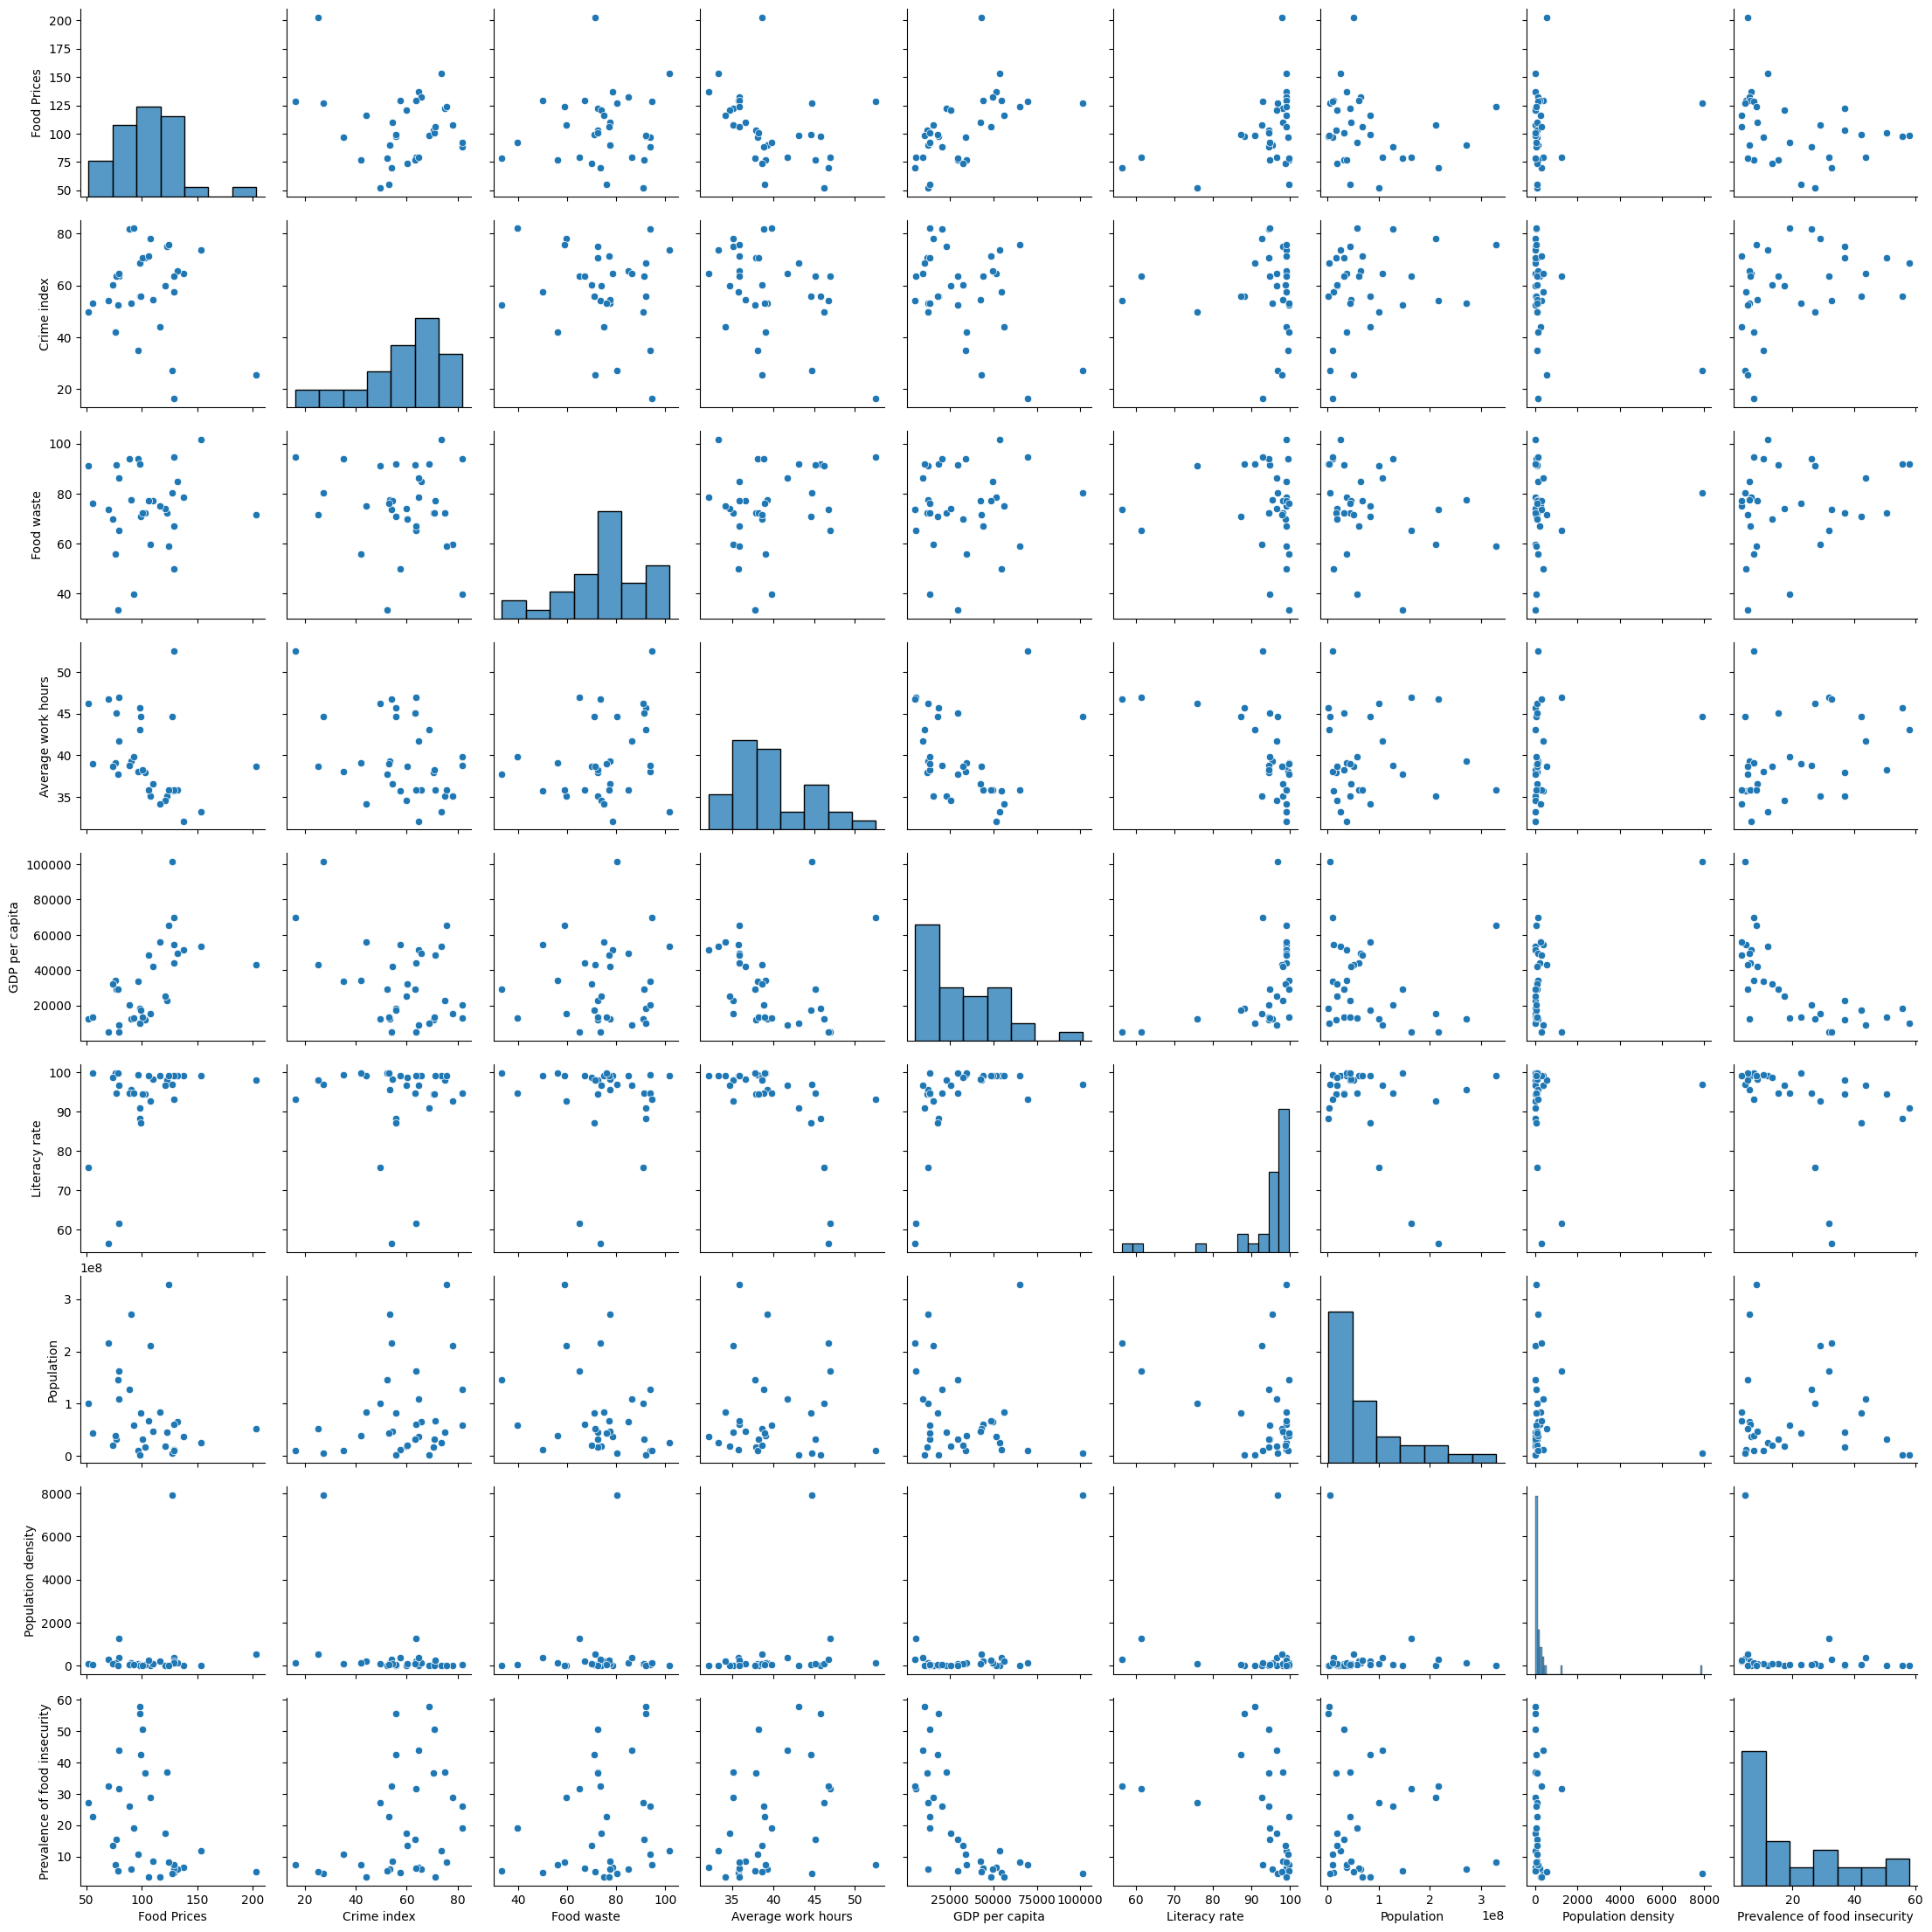

In [8]:
pp = sns.pairplot(data=df)

In [9]:
df.columns

Index(['Country', 'Food Prices', 'Crime index', 'Food waste',
       'Average work hours', 'GDP per capita', 'Literacy rate', 'Population',
       'Population density', 'Prevalence of food insecurity'],
      dtype='object')

### Preliminary Analysis

As observed below, literacy rate does not seem to be an adequate predictor value due to its congregation around the max value of `100`, with some outliers. It may be more productive to use it in conjunction with another complementary predictor, such as population, as we can then determine the absolute size of the literate population for instance.

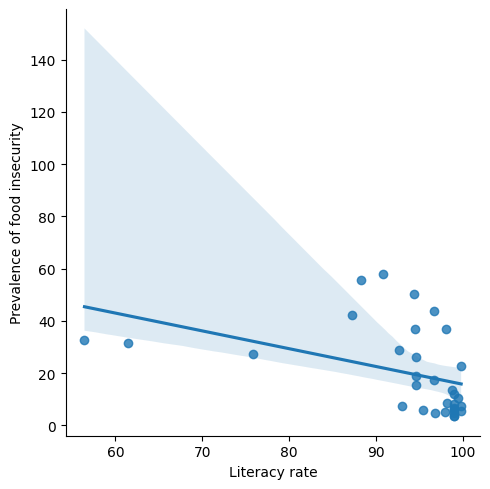

In [10]:
myplot = sns.lmplot(x="Literacy rate", y="Prevalence of food insecurity", data=df)

While the data points are generally scattered due to the wide variation in each country's economic and social situations, there is still a linear trend that can be observed.

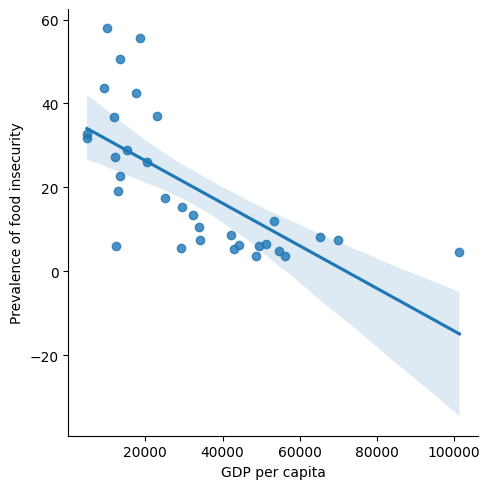

In [11]:
myplot = sns.lmplot(x="GDP per capita", y="Prevalence of food insecurity", data=df)

We observed that there may be a polynomial relationship between GDP per capita and food insecurity prevalence. However, this may not be the case as this hypothesis takes into account the extreme data point (where GDP per capita is around `1e5`).

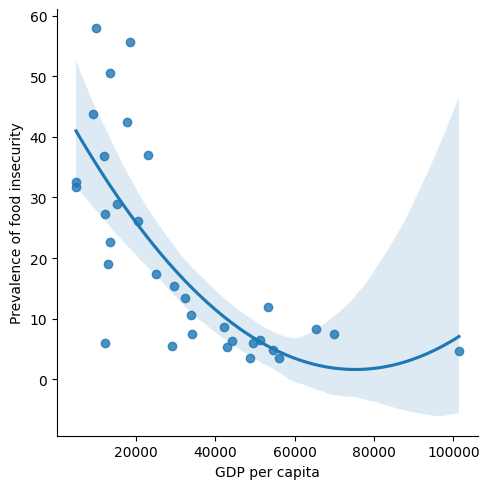

In [12]:
myplot = sns.lmplot(x="GDP per capita", y="Prevalence of food insecurity", data=df, order=2)

Instead, as the scatterplot reveals a graph of exponential nature, performing a logarithmic transformation on GDP per capita revealed a better linear relationship.

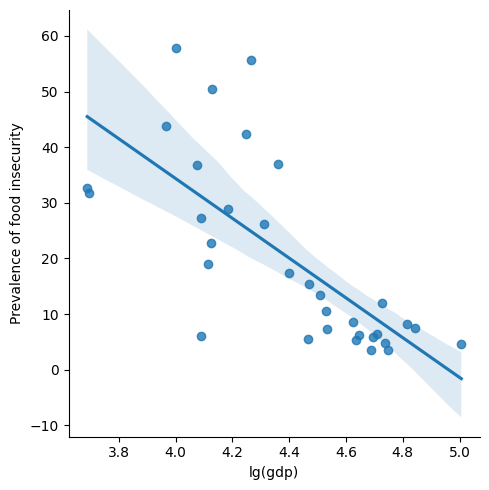

In [13]:
df_new = df.copy()
df_new["lg(gdp)"] = np.log10(df_new["GDP per capita"])
myplot = sns.lmplot(x="lg(gdp)", y="Prevalence of food insecurity", data=df_new)

## Building the Model

The visualisation of the variables' relationships with each other and the nature of the problem statement points towards a Linear Regression model.

### Functions for Modelling

We included modelling functions that will help us prepare and split the data sets for training and testing.

In [14]:
def normalise_z(_df):
    dfout = _df.copy()
    dfout = (_df - _df.mean()) / _df.std()
    return dfout

def normalise_minmax(_df):
    dfout = (_df - _df.min()) / (_df.max() - _df.min())
    return dfout

def get_features_targets(_df, feature_names, target_names):
    return _df[feature_names], _df[target_names]

def prepare_feature(_feature):
    # get number of columns
    cols = len(_feature.columns)
    
    # convert the data frame to a numpy array and change it into a column vectors
    # shape the feature columns
    feature = _feature.to_numpy().reshape(-1, cols)
    rows = feature.shape[0] # get number of rows
    
    # create our ones
    ones = np.ones((rows, 1))
    
    return np.concatenate((ones, feature), axis=1)

def prepare_target(_target):
    # convert the data frame to a numpy array and change it into column vectors
    cols = len(_target.columns)
    target = _target.to_numpy().reshape(-1, cols)
    return target

def poly_features(_df, colname, colname_transformed, degree=2):
    col = _df[colname]
    _df[colname_transformed] = np.power(col, degree)
    return _df

def lg_features(_df, colname, colname_transformed):
    col = _df[colname]
    _df[colname_transformed] = np.log10(col)
    return _df

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    np.random.seed(random_state)
    n = len(df_feature)
    
    test_num = int(n * (test_size))
    
    test_idx = np.random.choice(n, test_num, replace=False)
    train_idx = [i for i in range(n) if i not in test_idx]
    
    df_feature_test = df_feature.iloc[test_idx]
    df_feature_train = df_feature.iloc[train_idx]
    df_target_test = df_target.iloc[test_idx]
    df_target_train = df_target.drop(test_idx)
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def calc_linear(X, beta):
    return np.matmul(X, beta)

def predict(_feature, beta):
    X = prepare_feature(normalise_z(_feature))
    return calc_linear(X, beta)

### Linear Regression Helper Class

The `LinearRegression` class contains the training, prediction and cost computation required for multiple linear regression.

In [15]:
# Linear Regression class
class LinearRegression:
    def __init__(self):
        self.beta = None
        self.J_storage = None
    
    def compute_cost(self, X, y, beta=None):
        """Compute the cost function.

        Args:
            X (np.ndarray): 2D Numpy feature array.
            y (np.ndarray): 2D Numpy target array.
            beta (numpy.ndarray, optional): 2D Numpy parameter array. Defaults to None.
            store(bool): Boolean on whether to store the J value.

        Returns:
            np.ndarray: J storage.
        """
        m = X.shape[0]
        if beta is None:
            beta = self.beta
        error = calc_linear(X, beta) - y
        error_sq = error.T @ error
        J = (1/(2*m)) * error_sq
        J = J[0][0]
        return J
    
    def predict(self, _feature):
        """Predicts target values.

        Args:
            _feature (np.ndarray): 2D Numpy feature array.

        Returns:
            np.ndarray: Predicted values.
        """
        return predict(_feature, self.beta)

    def fit(self, X, y, iterations, alpha):
        """Fits linear regression model using gradient descent.

        Args:
            X (np.ndarray): 2D Numpy feature array.
            y (np.ndarray): 2D Numpy target array.
            iterations (int): Number of iterations.
            alpha (float): Learning rate.

        Returns:
            (np.ndarray, np.ndarray): Tuple of beta and J.
        """
        n, p = X.shape
        self.J_storage = np.zeros((iterations, 1))
        # Generate random beta weights
        beta = np.random.randn(p, 1) / np.sqrt(n)
        #beta = np.zeros((p, 1))
        for i in range(iterations):
            y_hat = calc_linear(X, beta)
            deriv = np.matmul(X.T, y_hat - y)
            beta -= alpha * (1/n) * deriv
            self.J_storage[i] = self.compute_cost(X, y, beta=beta)
        self.beta = beta
        return beta, self.J_storage

### Evaluator Helper Class

The `Evaluator` class contains the training, prediction and cost computation required for multiple linear regression.

We will be using the following metrics to evaluate the model's effectiveness:
1. **Adjusted `r^2` score**: Proportion of variance in Y that can be accounted for by the regression (a value of 0 indicates the predictor variable x completely failed to ‘explain’ any of the variance in Y, while 1 indicates a perfectly linear fit). This will be our main metric to determine the model's accuracy.
2. **Mean Absolute Error**: Absolute difference between actual and predicted values in the dataset. We will aim to minimise this if possible.

In [16]:
# Evaluator class
class Evaluator:
    def __init__(self, target, prediction):
        self.target = target
        self.prediction = prediction

    def mean_absolute_error(self):
        """Evaluates the Mean Absolute Error.

        Returns:
            float: MAE.
        """
        n = self.target.shape[0]
        error = abs(self.target - self.prediction)
        return np.sum(error) / n
    
    def r2_score(self):
        """Evaluates the R2 score.

        Returns:
            float: R2 score.
        """
        SS_res = np.sum((self.prediction - self.target) ** 2)
        SS_tot = np.sum((self.target - self.target.mean()) ** 2)
        return 1 - (SS_res / SS_tot)

    def adjusted_r2_score(self):
        """Evaluates the Adjusted R2 score.

        Returns:
            float: Adjusted R2 score.
        """
        r2 = self.r2_score()
        N, p = self.target.shape
        adj_r2 = 1 - (1 - r2) * (N - 1) / (N - p - 1)
        return adj_r2

    def evaluate(self):
        """Evaluates the model.

        Returns:
            object: Object containing "mae", "r2" and "ar2" results.
        """
        r2 = self.r2_score()[0]
        ar2 = self.adjusted_r2_score()[0]
        mae = self.mean_absolute_error()[0]
        return { "mae": mae, "r2": r2, "ar2": ar2 }
    
    def __str__(self):
        evals = self.evaluate()
        return f"mae: {evals.mae} | r2: {evals.r2} | ar2: {evals.ar2}"

### Initial Model

In our first model, we trained it using the 8 predictor variables mentioned. Normalisation of the values was carried out due to the huge discrepancies in the scales of each variable.

We begin with an `iterations` value of `10000` and `alpha` of `0.01` to ensure a convergence of our cost function.

As observed, the `mae` score is very high (almost `1`) and the `ar2` score is negative, indicating a poor fit with linear regression.

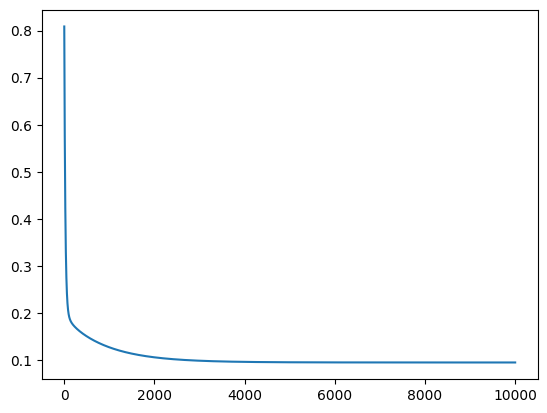

In [17]:
# As most of the code will be duplicated below, the comments here are to demonstrate what we are doing
# Predictor vars
columns = ['Food Prices', 'Crime index', 'Food waste',
       'Average work hours', 'GDP per capita', 'Literacy rate', 'Population',
       'Population density']

# Getting the features and target from the data frame
df_features, df_target = get_features_targets(df, columns, ["Prevalence of food insecurity"])

# Normalising features and target
df_features = normalise_z(df_features)
df_target = normalise_z(df_target)

# Splitting the data sets for training and testing
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Prepare the features and target
feature = prepare_feature(df_features_train)
target = prepare_target(df_target_train)

# Instantiate LinearRegression helper class
model = LinearRegression()
iterations = 10000
alpha = 0.01

# Fit a linear regression line
model.fit(feature, target, iterations, alpha)

# Predict using the model on testing features
predicted = model.predict(df_features_test)

plt.plot(model.J_storage)

The cost curve converges nicely.

## Evaluating the Model

We then carried out our evaluation of the model using the metrics written in our `Evaluator` class.

In [18]:
score = Evaluator(df_target_test, predicted).evaluate()
print(str(score))

{'mae': 0.8699949460074623, 'r2': -0.4670567676529933, 'ar2': -0.6766363058891351}


As observed, the value of `ar2` is negative, indicating a very poor fit of the model.

Likewise, the `mae` score is very high (near `1`), demonstrating large disparity between our predicted and actual data.

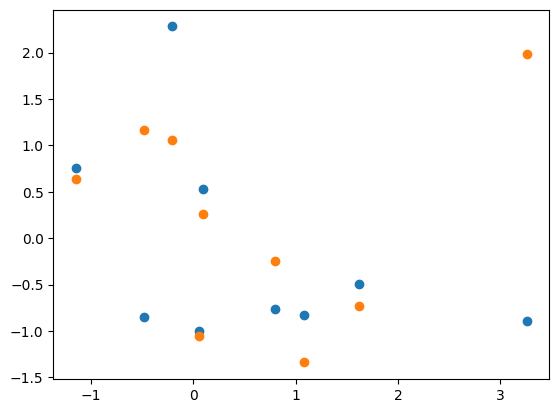

In [19]:
plt.scatter(df_features_test["Food Prices"], df_target_test)
plt.scatter(df_features_test["Food Prices"], predicted)

As shown above, the difference between the actual (blue) and predicted (orange) values vary by a wide margin.

This is likely due to the large quantity of predictors that is being used to train.

**We need a contingency plan.** Back to the drawing board.

![NO](https://media.tenor.com/ibQZUQ2-uTsAAAAd/happy-birthday.gif)

## Improving the Model

### Iteration 2

After further research, we concluded that the income of an individual greatly affects whether they are able to afford enough quantities of food, or their ability to purchase nutritious food to meet their needs (which is measured by prevalence of food insecurity).

We have also concluded that while asymmetries in a country's food supply (demonstrated by the relationship between food insecurity and food waste - if food waste is high while there is high food insecurity, it means a country has asymmetry in their food provision to their citizens) is a good contributing factor to food insecurity, it may not be suitable for our model due to its complicated nature with our target variable.

We also figured that due to `GDP per capita` and `Population density` both indirectly involving the population of a country in its metrics, we should remove it in our training (see analysis below).

Thus, we shall prepare to include the average wages of a country's citizens into our dataset.

In [20]:
def prepare_wage(_df):
    dfout = prepare_countries(_df)
    dfout = dfout[dfout["Country"].isin(countries)][["Country", "Average monthly net salary"]]
    return prepare_types(dfout, "Average monthly net salary", float)

df_wage = pd.read_csv("datasets/average-wage.csv")
df_wage = prepare_wage(df_wage)

df = merge_data([df.copy(), df_wage])
display(df)

,Country,Food Prices,Crime index,Food waste,Average work hours,GDP per capita,Literacy rate,Population,Population density,Prevalence of food insecurity,Average monthly net salary
0,Argentina,122.409,75.11,72.432163,35.13,22947.0,98.0900,44780677,16.580893,37.0,433.00
1,Australia,153.540,73.51,101.697811,33.23,53320.0,99.0000,25203198,3.340250,11.9,4026.45
2,Bangladesh,79.094,63.66,65.124075,46.93,4951.0,61.4938,163046161,1265.186932,31.7,249.05
3,Belgium,129.240,57.38,49.919512,35.71,54545.0,99.0000,11539328,381.249703,4.8,2415.69
4,Botswana,98.008,55.67,91.939766,45.75,18503.0,88.2244,2303697,4.149463,55.6,468.01
5,Brazil,107.662,77.93,59.598854,35.11,15259.0,92.5868,211049527,25.431425,28.9,373.44
6,Canada,137.341,64.58,78.541621,32.10,51342.0,99.0000,37411047,4.242577,6.5,3132.77
7,Chile,120.959,59.80,73.920770,34.63,25155.0,96.6275,18952038,25.710002,17.4,579.40
8,Ecuador,103.177,70.59,72.432163,37.90,11847.0,94.5155,17373662,71.038251,36.8,494.62
9,Egypt,52.288,49.68,91.016180,46.23,12251.0,75.8426,100388073,102.802153,27.3,173.47


Here, we have added the variable `Average monthly net salary` into our dataset and removed `Food waste` and `Population`. We shall carry out our training again.

beta: [[ 1.64828471e-01]
 [ 7.76072827e-01]
 [ 8.75567650e-04]
 [ 7.42808007e-01]
 [-1.31771632e+00]
 [ 3.72357875e-01]
 [ 1.82315639e-01]
 [ 1.75253801e-01]]


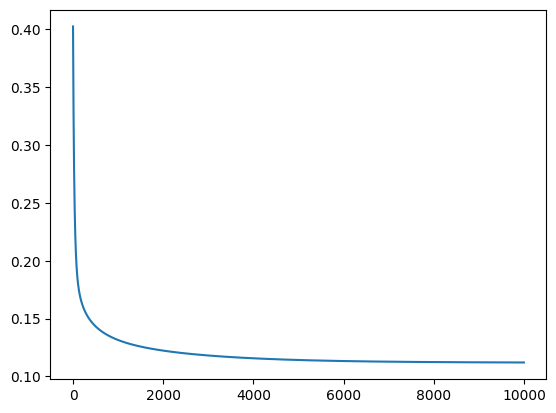

In [21]:
columns = ['Food Prices', 'Crime index',
       'Average work hours', 'GDP per capita', 'Literacy rate',
       'Population density', 'Average monthly net salary']

df_features, df_target = get_features_targets(df, columns, ["Prevalence of food insecurity"])
df_features = normalise_z(df_features)
df_target = normalise_z(df_target)

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

feature = prepare_feature(df_features_train)
target = prepare_target(df_target_train)

model = LinearRegression()
iterations = 10000
alpha = 0.01

model.fit(feature, target, iterations, alpha)
print(f"beta: {model.beta}")
predicted = model.predict(df_features_test)

plt.plot(model.J_storage)

Here we see a definite improvement in our model. However, the `ar2` value is still negative, which is worrying. No matter, we shall continue.

In [22]:
score = Evaluator(df_target_test, predicted).evaluate()
print(str(score))

{'mae': 0.7939254815480269, 'r2': -0.1477633670665699, 'ar2': -0.31172956236179417}


### Iteration 3

At this point, we explored non-linear relationships between some of the predictors and target.

We first noticed that, as in our [preliminary analysis](#preliminary-analysis), the literacy rate of a population may perform better as a metric in conjunction with population size, as it is a percentage value rather than an absolute value.

Similarly, we also chose to transform `GDP per capita` with a logarithmic transformation.

In [23]:
columns = ['Food Prices', 'Crime index', 'Food waste',
       'Average work hours', 'GDP per capita', 'Literacy rate', 'Population',
       'Population density', 'Average monthly net salary']

df_new = df.copy()
#df_new["Food insecure population"] = df_new["Prevalence of food insecurity"].multiply(df_new["Population"])

df_new["lit * pop"] = df_new["Literacy rate"] * df_new["Population"]
df_new = lg_features(df_new, "lit * pop", "lg(l*p)")

#df_new = poly_features(df_new, "GDP per capita", "gdp2", 2)
df_new = lg_features(df_new, "GDP per capita", "lg(gdp)")

print(df_new.columns)

Index(['Country', 'Food Prices', 'Crime index', 'Food waste',
       'Average work hours', 'GDP per capita', 'Literacy rate', 'Population',
       'Population density', 'Prevalence of food insecurity',
       'Average monthly net salary', 'lit * pop', 'lg(l*p)', 'lg(gdp)'],
      dtype='object')


Afterwards, we determined which predictor variables would contribute best to the model through brute force, by training with every combination of the predictors against the target.

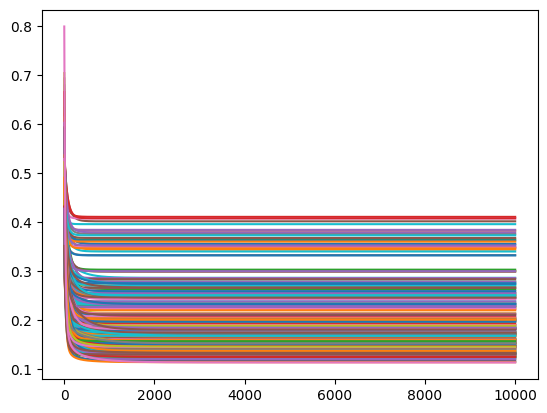

In [30]:
columns_new = ['Food Prices', 'Crime index', 'Food waste', 'Average work hours',
       'Population density', 'Average monthly net salary',
       'lg(l*p)', 'lg(gdp)']

models = []
idx = 0

import itertools
# Iterating from combination of 2 vars to all
for L in range(2, len(columns_new) + 1):
       for subset in itertools.combinations(columns_new, L):
              _ss = np.array(subset)
              transform = ["GDP per capita"]

              df_features, df_target = get_features_targets(df_new, _ss, ["Prevalence of food insecurity"])

              df_features = normalise_z(df_features)
              df_target = normalise_z(df_target)

              df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

              feature = prepare_feature(df_features_train)
              target = prepare_target(df_target_train)

              model = LinearRegression()
              iterations = 10000
              alpha = 0.01

              model.fit(feature, target, iterations, alpha)
              #print(f"beta: {model.beta}")
              predicted = model.predict(df_features_test)

              plt.plot(model.J_storage)

              score = Evaluator(df_target_test, predicted).evaluate()
              # Store the models' betas and scores for comparison later
              models.append({ "score": score, "set": _ss, "id": idx, "beta": model.beta })
              idx += 1

We have thus determined that with the variables `Crime index`, `Average work hours`, `Population density`, `log(Literacy rate * Population)` and `log(GDP per capita)`, this provides us with the best predicted results, with the highest `ar2` value and a low `mae` score.

In [25]:
max(models, key=lambda s: s["score"]["ar2"])

{'score': {'mae': 0.3978386934282058,
  'r2': 0.8094584126318735,
  'ar2': 0.7822381858649983},
 'set': array(['Crime index', 'Average work hours', 'Population density',
        'lg(l*p)', 'lg(gdp)'], dtype='<U18'),
 'id': 201,
 'beta': array([[ 0.03342326],
        [ 0.34147666],
        [ 0.2204132 ],
        [-0.02945311],
        [-0.36899377],
        [-0.60442919]])}

In minimising `mae` score, we have a similar set of predictors except `Population density` is replaced with `Average monthly net salary`. The `ar2` score is still favourable. Thus, we will use this model.

In [26]:
min(models, key=lambda s: s["score"]["mae"])

{'score': {'mae': 0.37813415311690335,
  'r2': 0.8062037414397729,
  'ar2': 0.7785185616454547},
 'set': array(['Crime index', 'Average work hours', 'Average monthly net salary',
        'lg(l*p)', 'lg(gdp)'], dtype='<U26'),
 'id': 202,
 'beta': array([[ 0.01945387],
        [ 0.35765517],
        [ 0.21941007],
        [-0.07768306],
        [-0.35283868],
        [-0.54805518]])}

### Iterating Learning Rate

Our hypothesis is that due to the convergence of the training's cost function, the learning rate does not have significant effect on the accuracy of our model. We shall test this by iterating through training between an alpha of `0.001` to `0.1`.

{'score': {'mae': 0.37814526514997826,
  'r2': 0.8062075179072208,
  'ar2': 0.7785228776082523},
 'beta': array([[ 0.01947131],
        [ 0.35761536],
        [ 0.21935085],
        [-0.0775842 ],
        [-0.35285805],
        [-0.54818998]]),
 'alpha': 0.004}

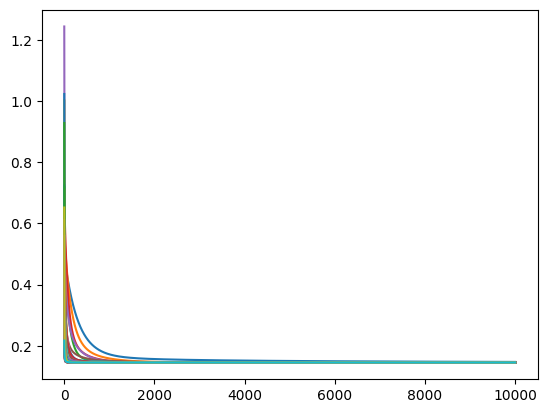

In [32]:
columns = ['Crime index', 'Average work hours', 'Average monthly net salary', 'lg(l*p)', 'lg(gdp)']

df_new = df.copy()

df_new["lit * pop"] = df_new["Literacy rate"] * df_new["Population"]
df_new = lg_features(df_new, "lit * pop", "lg(l*p)")

df_new = lg_features(df_new, "GDP per capita", "lg(gdp)")

df_features, df_target = get_features_targets(df_new, columns, ["Prevalence of food insecurity"])
df_features = normalise_z(df_features)
df_target = normalise_z(df_target)

#df_features = poly_features(df_features, transform, transform, 2)
#df_features = lg_features(df_features, transform, transform)

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

feature = prepare_feature(df_features_train)
target = prepare_target(df_target_train)

model = LinearRegression()
iterations = 10000

alpha_models = []

for n in range(0, 100):
    # Iterate from n = 0.001 to 0.1, in increments of 0.001
    alpha = 0.001 + n/1000

    model.fit(feature, target, iterations, alpha)
    predicted = model.predict(df_features_test)

    score = Evaluator(df_target_test, predicted).evaluate()
    alpha_models.append({ "score": score, "beta": model.beta, "alpha": alpha })
    plt.plot(model.J_storage)

max(alpha_models, key=lambda s: s["score"]["ar2"])

As observed, the cost curves all show promising convergence but the difference in `ar2` values between a learning rate of `0.004` and `0.01` is insignificant. Thus, our hypothesis is true and we shall remain using the original `alpha` value from [iteration 3](#iteration-3).

## Discussion and Analysis

### Improvements over Iterations

The following changes to the training process were made to improve our model:
* **Removing noisy predictors**: Although all the features were insignificant and non-collinear, due to the noise that some predictors added to the model, removing them helped to improve the `ar2` score of our model.
* **Adding relevant predictors**: Some features were shown to be crucial to our model due to research and should be included. After their addition, they were shown to have helped improved the fit of our model.
* **Logarithmic transformation**: Our analysis showed that some features do not have a linear relationship with `Prevalence of food insecurity`, hence after a logarithmic transformation we were able to improve the fit of our linear regression model.

### Final Model

* Using curated predictors, removing noisy ones and adding relevant features
* Logarithmic transformation
* Retained `alpha` learning rate of `0.01`, with `iterations=10000`
* Minimises `mae` score

{'mae': 0.37813415311690335, 'r2': 0.8062037414397729, 'ar2': 0.7785185616454547}
[[ 0.01945387]
 [ 0.35765517]
 [ 0.21941007]
 [-0.07768306]
 [-0.35283868]
 [-0.54805518]]


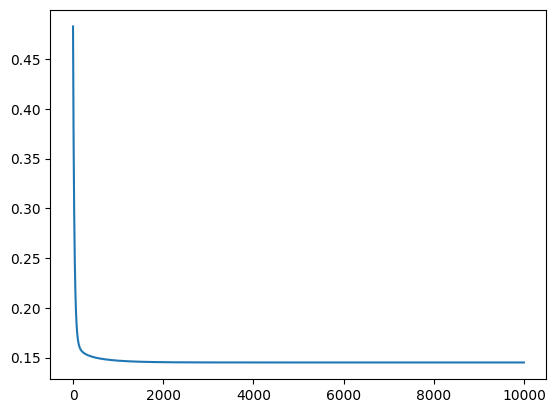

In [31]:
columns = ['Crime index', 'Average work hours', 'Average monthly net salary', 'lg(l*p)', 'lg(gdp)']

df_new = df.copy()

df_new["lit * pop"] = df_new["Literacy rate"] * df_new["Population"]
df_new = lg_features(df_new, "lit * pop", "lg(l*p)")

df_new = lg_features(df_new, "GDP per capita", "lg(gdp)")

df_features, df_target = get_features_targets(df_new, columns, ["Prevalence of food insecurity"])
df_features = normalise_z(df_features)
df_target = normalise_z(df_target)

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

feature = prepare_feature(df_features_train)
target = prepare_target(df_target_train)

model = LinearRegression()
iterations = 10000
alpha = 0.01

model.fit(feature, target, iterations, alpha)
predicted = model.predict(df_features_test)

score = Evaluator(df_target_test, predicted).evaluate()
plt.plot(model.J_storage)
print(str(score))
print(model.beta)

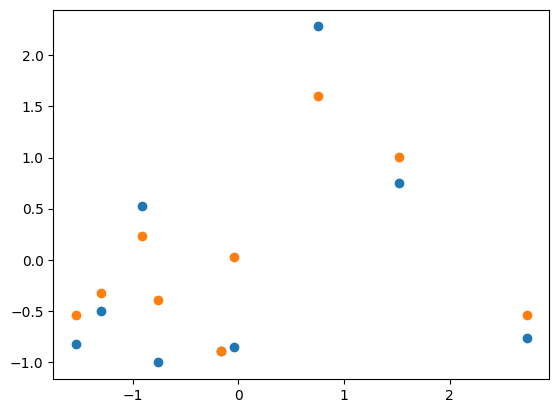

In [29]:
plt.scatter(df_features_test["Average work hours"], df_target_test)
plt.scatter(df_features_test["Average work hours"], predicted)